## Problem 1.2: Perceptron

In [1]:
# Import libraries

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import dataset

input_data = np.array([[1, 1],
              [2, -2], 
             [-1, -1.5],
             [-2, -1],
             [-2, 1],
             [1.5, -0.5]])

X = np.concatenate((np.ones([input_data.shape[0], 1]) ,input_data),axis=1).T
print("Features: \n",X, "\n")

y = np.array([1, -1, -1, -1, 1, 1])
print("Labels: \n",y)

Features: 
 [[ 1.   1.   1.   1.   1.   1. ]
 [ 1.   2.  -1.  -2.  -2.   1.5]
 [ 1.  -2.  -1.5 -1.   1.  -0.5]] 

Labels: 
 [ 1 -1 -1 -1  1  1]


In [3]:
def scatter_plot():
    plt.figure()
    plt.scatter(X[1,y==1], X[2, y==1], label='class 1')
    plt.scatter(X[1,y==-1], X[2, y==-1], label='class -1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()

<IPython.core.display.Javascript object>


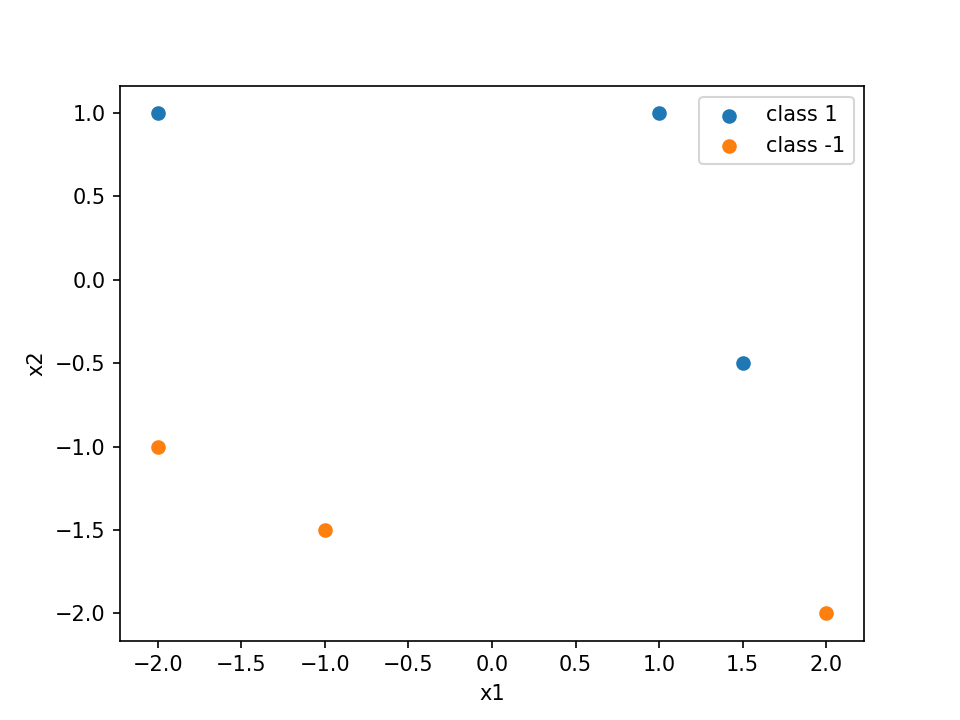

In [4]:
scatter_plot()

In [5]:
# weights
w = np.array([[1], [1], [1]])

def get_params():
    return (w.reshape(w.shape[0]))

[w0, w1, w2] = get_params()

In [6]:
def plot_fit(title):
    [w0, w1, w2] = get_params()
    x1 = np.array([-4, 4])
    x2 = (-w0 - w1 * x1) / w2   
    scatter_plot()
    plt.plot(x1, x2, 'r')
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.show()

<IPython.core.display.Javascript object>


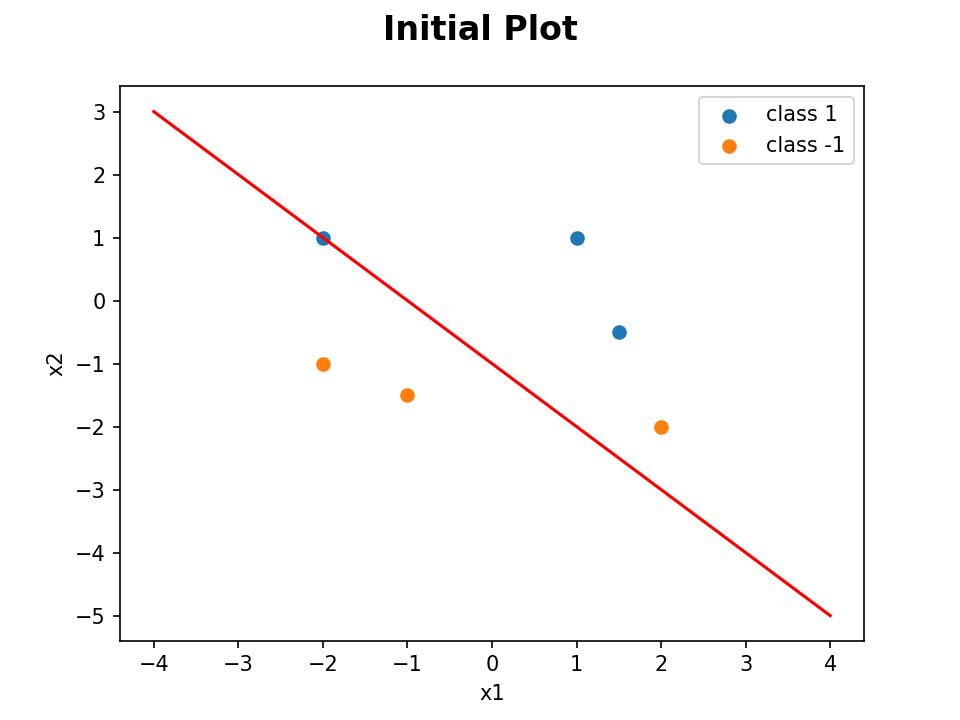

In [7]:
plot_fit('Initial Plot')

In [8]:
# Train the perceptron
epochs = 2
num_iter = epochs * X.shape[1]

i = 0
w = np.array([[0], [0], [0]])

for _ in range(1,num_iter+1):
    pred = np.matmul(w.T, X[:,i])
    
    # Check for misclassified datapoints
    if pred * y[i] < 0:
        w = w + (0.1  * X[:,i] * y[i]).reshape(X.shape[0],1)
        
    # To send in data points from begining
    if i == X.shape[1] - 1:
        i = 0
    
    i = i+1

In [129]:
predictions = np.matmul(w.T, X)
print("Predictions: \n", predictions, "\n")
print("Weights: \n", w)

Predictions: 
 [[ 2.8 -0.8 -1.9 -1.8  1.   1. ]] 

Weights: 
 [[0.8]
 [0.6]
 [1.4]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


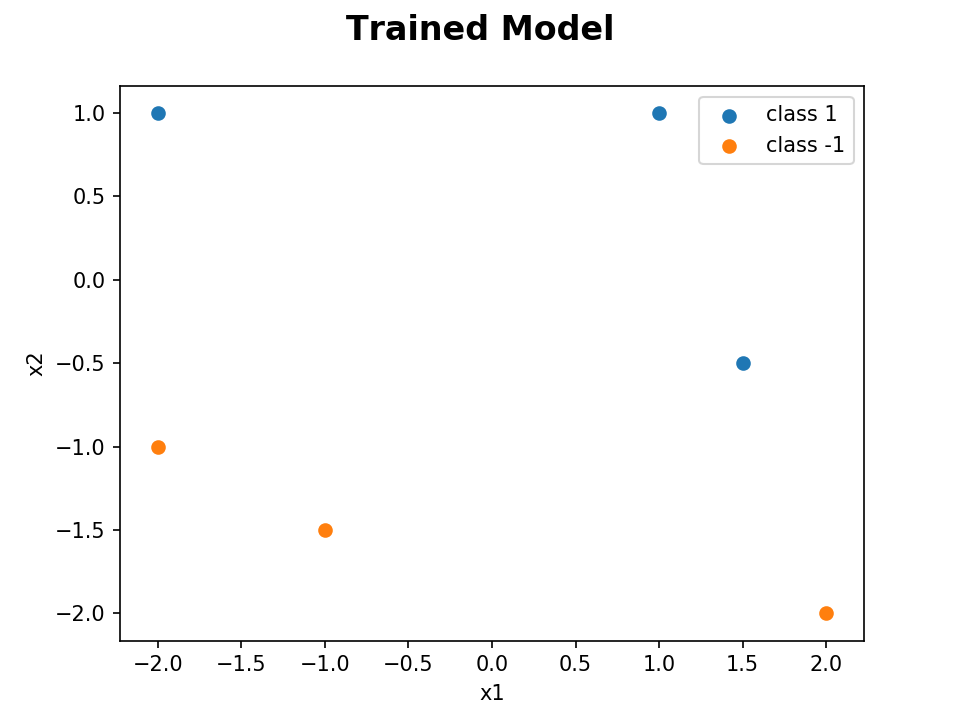

In [9]:
# Plot trained model
plot_fit("Trained Model")